# Análise de Vendas - Produtos Vendidos em uma loja

**Importando a base de dados**

In [20]:
import pandas as pd

In [21]:
vendas = pd.read_excel('/content/drive/MyDrive/bases_de_dados/Base Vendas.xlsx')
devolucoes = pd.read_excel('/content/drive/MyDrive/bases_de_dados/Base Devoluções.xlsx')
vendas.head(10)

,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario
0,HL4379,Televisão,5,Gabriel,Thoni,6/30/2018,Curitiba,2500
1,HL4379,Televisão,3,Renan,Nascimento,9/14/2018,Recife,2500
2,HL1148,Câmera,2,Camila,Sobral,10/21/2018,Fortaleza,2100
3,HL1918,iPhone,3,Clara,Bruno,7/8/2018,Fortaleza,5300
4,HL9962,Android,4,Eduardo,Pacheco,12/19/2018,Fortaleza,3400
5,HL1918,iPhone,4,Sarah,Souza,2/14/2018,São Paulo,5300
6,HL7348,SmartWatch,3,Alexandre,Rodriguez,5/20/2018,São Paulo,1400
7,HL2714,Tablet,2,Thays,Castro,3/7/2018,Curitiba,1600
8,HL4379,Televisão,4,Jessica,Cordovil,2/11/2018,Rio de Janeiro,2500
9,HL1148,Câmera,3,Camille,Silva,3/26/2018,São Paulo,2100


In [8]:
devolucoes.head(10)

,SKU,Produto,Quantidade Devolvida,Data,Loja,Preço Unitário
0,HL7348,SmartWatch,5,12/14/2018,São Paulo,1400
1,HL7348,SmartWatch,4,8/9/2018,Rio de Janeiro,1400
2,HL6259,Notebook,1,5/29/2018,Rio de Janeiro,3500
3,HL1148,Iphone,3,10/31/2018,Belo Horizonte,5300
4,HL7348,SmartWatch,5,10/7/2018,Fortaleza,1400
5,HL6259,Notebook,1,6/10/2018,Curitiba,3500
6,HL7348,SmartWatch,1,2/6/2018,Belo Horizonte,1400
7,HL7348,SmartWatch,2,1/24/2018,Porto Alegre,1400
8,HL2714,Tablet,3,7/26/2018,Fortaleza,1600
9,HL7348,SmartWatch,2,7/8/2018,Fortaleza,1400


# Primeiras impressões - Base de Vendas

In [22]:
vendas.head(10)

,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario
0,HL4379,Televisão,5,Gabriel,Thoni,6/30/2018,Curitiba,2500
1,HL4379,Televisão,3,Renan,Nascimento,9/14/2018,Recife,2500
2,HL1148,Câmera,2,Camila,Sobral,10/21/2018,Fortaleza,2100
3,HL1918,iPhone,3,Clara,Bruno,7/8/2018,Fortaleza,5300
4,HL9962,Android,4,Eduardo,Pacheco,12/19/2018,Fortaleza,3400
5,HL1918,iPhone,4,Sarah,Souza,2/14/2018,São Paulo,5300
6,HL7348,SmartWatch,3,Alexandre,Rodriguez,5/20/2018,São Paulo,1400
7,HL2714,Tablet,2,Thays,Castro,3/7/2018,Curitiba,1600
8,HL4379,Televisão,4,Jessica,Cordovil,2/11/2018,Rio de Janeiro,2500
9,HL1148,Câmera,3,Camille,Silva,3/26/2018,São Paulo,2100


In [23]:
# criando uma nova coluna para o nome completo e removendo as colunas nome e sobrenome
vendas['Nome Completo'] = vendas[['Primeiro Nome', 'Sobrenome']].apply(lambda x: ' '.join(x), axis=1)
vendas.drop(columns=['Primeiro Nome', 'Sobrenome'], inplace=True)

In [36]:
# criando a coluna Faturamento
vendas['Faturamento'] = vendas['Preco Unitario'] * vendas['Quantidade Vendida']

In [37]:
# organizando as colunas
vendas = vendas[['SKU', 'Produto', 'Quantidade Vendida', 'Nome Completo', 'Data', 'Loja', 'Preco Unitario', 'Faturamento']]
vendas.head(10)

,SKU,Produto,Quantidade Vendida,Nome Completo,Data,Loja,Preco Unitario,Faturamento
0,HL4379,Televisão,5,Gabriel Thoni,6/30/2018,Curitiba,2500,12500
1,HL4379,Televisão,3,Renan Nascimento,9/14/2018,Recife,2500,7500
2,HL1148,Câmera,2,Camila Sobral,10/21/2018,Fortaleza,2100,4200
3,HL1918,iPhone,3,Clara Bruno,7/8/2018,Fortaleza,5300,15900
4,HL9962,Android,4,Eduardo Pacheco,12/19/2018,Fortaleza,3400,13600
5,HL1918,iPhone,4,Sarah Souza,2/14/2018,São Paulo,5300,21200
6,HL7348,SmartWatch,3,Alexandre Rodriguez,5/20/2018,São Paulo,1400,4200
7,HL2714,Tablet,2,Thays Castro,3/7/2018,Curitiba,1600,3200
8,HL4379,Televisão,4,Jessica Cordovil,2/11/2018,Rio de Janeiro,2500,10000
9,HL1148,Câmera,3,Camille Silva,3/26/2018,São Paulo,2100,6300


In [25]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SKU                 9999 non-null   object
 1   Produto             9999 non-null   object
 2   Quantidade Vendida  9999 non-null   int64 
 3   Nome Completo       9999 non-null   object
 4   Data                9999 non-null   object
 5   Loja                9999 non-null   object
 6   Preco Unitario      9999 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 546.9+ KB


*Aparentemente o dataframe não possui missing values*

In [27]:
vendas.dtypes

SKU                   object
Produto               object
Quantidade Vendida     int64
Nome Completo         object
Data                  object
Loja                  object
Preco Unitario         int64
dtype: object

# Análises Gráficas da Base de Dados de Vendas


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [38]:
vendas.head(10)

,SKU,Produto,Quantidade Vendida,Nome Completo,Data,Loja,Preco Unitario,Faturamento
0,HL4379,Televisão,5,Gabriel Thoni,6/30/2018,Curitiba,2500,12500
1,HL4379,Televisão,3,Renan Nascimento,9/14/2018,Recife,2500,7500
2,HL1148,Câmera,2,Camila Sobral,10/21/2018,Fortaleza,2100,4200
3,HL1918,iPhone,3,Clara Bruno,7/8/2018,Fortaleza,5300,15900
4,HL9962,Android,4,Eduardo Pacheco,12/19/2018,Fortaleza,3400,13600
5,HL1918,iPhone,4,Sarah Souza,2/14/2018,São Paulo,5300,21200
6,HL7348,SmartWatch,3,Alexandre Rodriguez,5/20/2018,São Paulo,1400,4200
7,HL2714,Tablet,2,Thays Castro,3/7/2018,Curitiba,1600,3200
8,HL4379,Televisão,4,Jessica Cordovil,2/11/2018,Rio de Janeiro,2500,10000
9,HL1148,Câmera,3,Camille Silva,3/26/2018,São Paulo,2100,6300


**Qual o faturamento total da empresa?**

In [52]:
faturamento_total = vendas['Faturamento'].sum()
print(f'O faturamento total foi de: R$ {faturamento_total:.2f}')

O faturamento total foi de: R$ 99319500.00


**Qual foi o produto mais vendido?**

In [54]:
vendas['Produto'].value_counts()

iPhone        2977
Televisão     1962
Android       1068
Notebook      1062
SmartWatch     995
Tablet         973
Câmera         962
Name: Produto, dtype: int64

[Text(0, 0.5, 'Quantidade Vendida'), Text(0.5, 1.0, 'Produtos mais vendidos')]

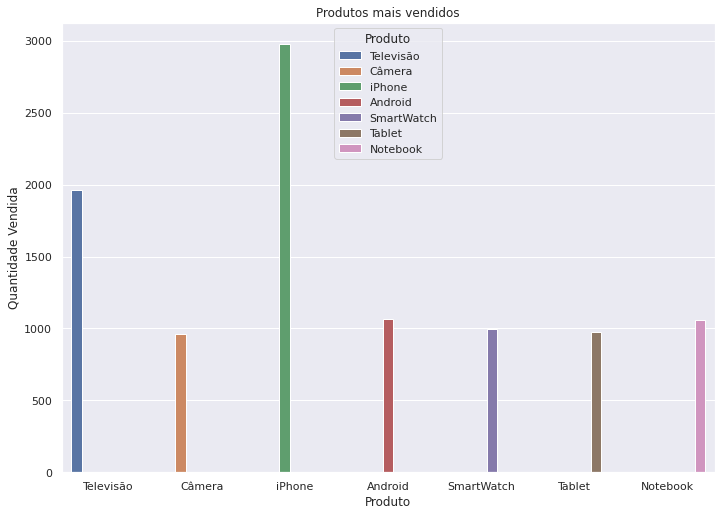

In [62]:
produto_mais_vendido = sns.countplot(x='Produto', hue='Produto', data=vendas)
produto_mais_vendido.set(title='Produtos mais vendidos', ylabel='Quantidade Vendida')

**Qual foi o faturamento por loja?**

In [58]:
vendas['Loja'].value_counts()

São Paulo         2226
Rio de Janeiro    1467
Fortaleza         1447
Salvador          1330
Goiás              732
Recife             725
Curitiba           719
Porto Alegre       704
Belo Horizonte     649
Name: Loja, dtype: int64

[Text(0, 0.5, 'Quantidade Vendida'),
 Text(0.5, 1.0, 'Quantidade de vendas por Loja')]

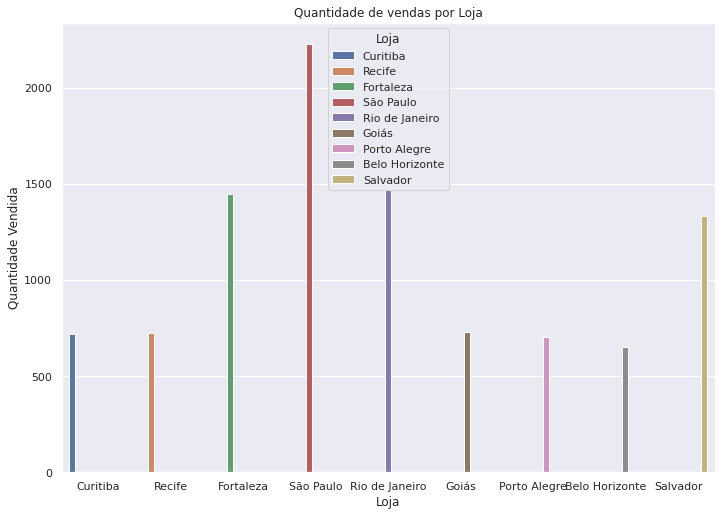

In [63]:
vendas_por_loja = sns.countplot(x='Loja', hue='Loja', data=vendas)
vendas_por_loja.set(title='Quantidade de vendas por Loja', ylabel='Quantidade Vendida')

In [162]:
vendas_por_produto = vendas.groupby('Produto')['Faturamento'].sum()
vendas_por_produto = vendas_por_produto.reset_index()
vendas_por_produto.sort_values(by=['Faturamento'], ascending=False)

,Produto,Faturamento
6,iPhone,47562200
5,Televisão,14827500
2,Notebook,11371500
0,Android,10822200
1,Câmera,5890500
4,Tablet,4673600
3,SmartWatch,4172000


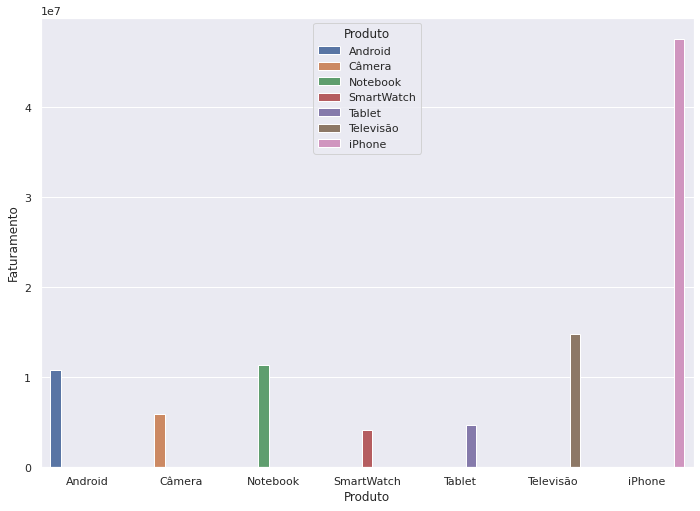

In [159]:
produtos_mais_vendidos = sns.barplot(x='Produto', y='Faturamento', hue='Produto', data=vendas_por_produto)

# Análises Gráficas da Base de Dados de Devoluções

In [164]:
devolucoes.head(10)

,SKU,Produto,Quantidade Devolvida,Data,Loja,Preço Unitário
0,HL7348,SmartWatch,5,12/14/2018,São Paulo,1400
1,HL7348,SmartWatch,4,8/9/2018,Rio de Janeiro,1400
2,HL6259,Notebook,1,5/29/2018,Rio de Janeiro,3500
3,HL1148,Iphone,3,10/31/2018,Belo Horizonte,5300
4,HL7348,SmartWatch,5,10/7/2018,Fortaleza,1400
5,HL6259,Notebook,1,6/10/2018,Curitiba,3500
6,HL7348,SmartWatch,1,2/6/2018,Belo Horizonte,1400
7,HL7348,SmartWatch,2,1/24/2018,Porto Alegre,1400
8,HL2714,Tablet,3,7/26/2018,Fortaleza,1600
9,HL7348,SmartWatch,2,7/8/2018,Fortaleza,1400


In [166]:
produtos_devolvidos = devolucoes.groupby('Produto')['Quantidade Devolvida'].sum()
produtos_devolvidos = produtos_devolvidos.reset_index()
produtos_devolvidos

,Produto,Quantidade Devolvida
0,Android,187
1,Câmera,143
2,Iphone,170
3,Notebook,174
4,SmartWatch,395
5,Tablet,301
6,Televisão,147


[Text(0.5, 1.0, 'Produtos mais devolvidos')]

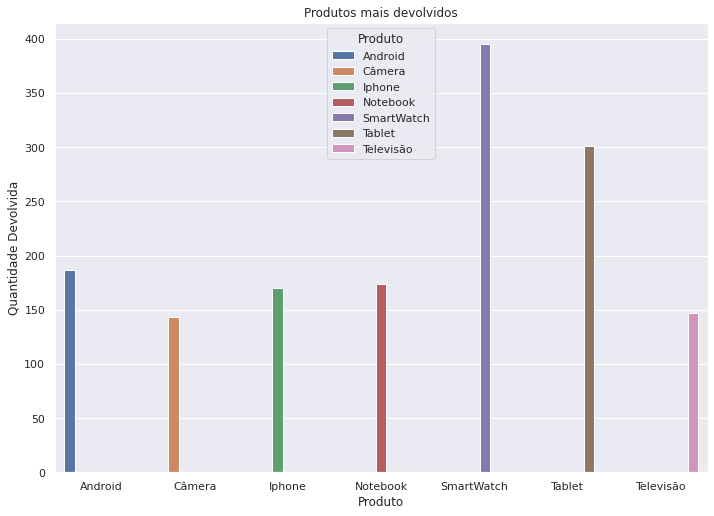

In [168]:
produtos_mais_devolvidos = sns.barplot(x='Produto', y='Quantidade Devolvida', hue='Produto', data=produtos_devolvidos)
produtos_mais_devolvidos.set(title='Produtos mais devolvidos')